Copyright ©2022. Stephen Rigden.
This program is free software: you can redistribute it and/or modify it under the terms of the GNU General Public License as published by the Free Software Foundation, either version 3 of the License, or (at your option) any later version.
This program is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the GNU General Public License for more details.
You should have received a copy of the GNU General Public License along with this program.  If not, see <http://www.gnu.org/licenses/>.

# Plot Blood Pressure

In [1]:
import pandas
from pathlib import Path
from matplotlib import pyplot
import seaborn

from heart_health.utilities import TimeCategories, create_blood_pressure_dataset


seaborn.set_style('darkgrid')  # one of {darkgrid, whitegrid, dark, white, ticks}

In [2]:
project_path = Path.cwd().parent.parent
heart_df_pickle = project_path / 'data' / 'processed' / 'heart_preprocessed.pickle'
blood_pressure_pdf = project_path / 'reports' / 'blood_pressure.pdf'
blood_pressure_jpg = project_path / 'reports' / 'blood_pressure.jpg'

In [3]:
ds = pandas.read_pickle(heart_df_pickle)
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1344 entries, 0 to 1343
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   value   1344 non-null   float64       
 1   type    1344 non-null   object        
 2   date    1344 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 42.0+ KB


In [4]:
bpds = create_blood_pressure_dataset(ds)
bpds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 672 entries, 0 to 671
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            672 non-null    datetime64[ns]
 1   systolic        672 non-null    float64       
 2   diastolic       672 non-null    float64       
 3   pulse pressure  672 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 26.2 KB


In [5]:
bpds.head()

,date,systolic,diastolic,pulse pressure
0,2020-06-01 00:00:00,120.0,79.0,41.0
1,2020-06-01 06:00:00,116.0,85.0,31.0
2,2020-06-01 12:00:00,113.0,90.0,23.0
3,2020-06-01 18:00:00,126.0,97.0,29.0
4,2020-06-02 00:00:00,117.0,75.0,42.0


In [6]:
start = bpds.date.min()
end = bpds.date.max()

categories = TimeCategories(start, end)
categories

TimeCategories(start_date=Timestamp('2020-06-09 18:00:00'), end_date=Timestamp('2020-11-15 18:00:00'), bin_size=16, bin_count=10)

In [7]:
bpds['bucket'] = bpds['date'].apply(categories.get_category)
bpds.tail()

,date,systolic,diastolic,pulse pressure,bucket
667,2020-11-14 18:00:00,134.0,80.0,54.0,2020-11-15
668,2020-11-15 00:00:00,120.0,72.0,48.0,2020-11-15
669,2020-11-15 06:00:00,104.0,90.0,14.0,2020-11-15
670,2020-11-15 12:00:00,128.0,87.0,41.0,2020-11-15
671,2020-11-15 18:00:00,114.0,81.0,33.0,2020-11-15


[Text(0.5, 0, '16 Day Intervals. (last day shown)'),
 Text(0, 0.5, 'observation count')]

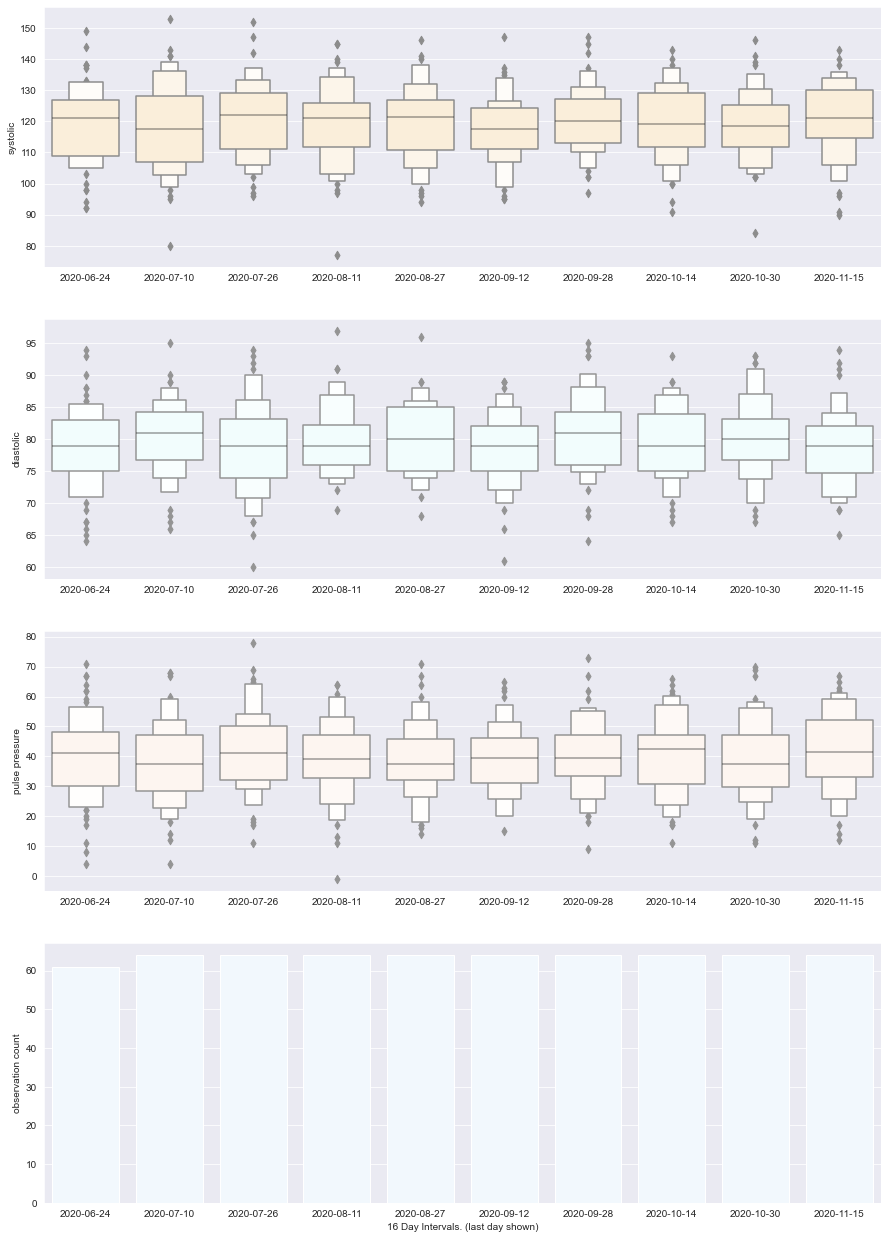

In [8]:
fig, axes = pyplot.subplots(nrows=4, ncols=1, figsize=(15, 22))

# Plot systolic
seaborn.boxenplot(data=bpds,
                  x='bucket', y='systolic',
                  ax=axes[0], palette=['papayawhip'])

# Plot diastolic
seaborn.boxenplot(data=bpds,
                  x='bucket', y='diastolic',
                  ax=axes[1], palette=['azure'])

# Plot pulse pressure
seaborn.boxenplot(data=bpds,
                  x='bucket', y='pulse pressure',
                  ax=axes[2], palette=['seashell'])

# Plot observation counts
seaborn.countplot(data=bpds,
                  x='bucket',
                  ax=axes[3], palette=['aliceblue'])

axes[0].set(xlabel=None)
axes[1].set(xlabel=None)
axes[2].set(xlabel=None)
axes[3].set(xlabel=f"{categories.bin_size} Day Intervals. (last day shown)", ylabel='observation count')

In [9]:
# Save the plots
fig.savefig(blood_pressure_jpg)
fig.savefig(blood_pressure_pdf)